## Machine Learning Final Project

This project will go over the common problem of predicting house prices based on various features of the houses. I will be using a dataset from Kaggle called Ames Housing dataset (https://www.kaggle.com/datasets/prevek18/ames-housing-dataset). It contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa.

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'data/AmesHousing.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Summary statistics
print(data.describe())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

After importing the dataset, we have to handle the missing values. I handle the missing the missing values by filling in the missing value with either the mean or the mode.

In [3]:
# Handle missing values
for column in data.columns:
    if data[column].dtype == np.number:
        data[column].fillna(data[column].mean(), inplace=True)
    else:
        data[column].fillna(data[column].mode()[0], inplace=True)

# Verify no missing values remain
print(data.isnull().sum().sum())  # Should output 0

<ipython-input-3-fff5586c8933>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-3-fff5586c8933>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-3-fff5586c8933>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-3-fff5586c8933>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[column].dtype == np.number:
<ipython-input-3-fff5586c8933>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is dep

0


## Perform Basic EDA and Visualization using Matplotlib

The first visualization is a histogram of Sale Prices. It shows the distribution, central tendency, and spread of the target variable, which is essential for understanding the output variable we are trying to predict.

The second visualization is a correlation heatmap. This visualizes relationships between numerical features and identifies potential predictors for the target variable. Strong correlations (positive or negative) can guide feature selection.



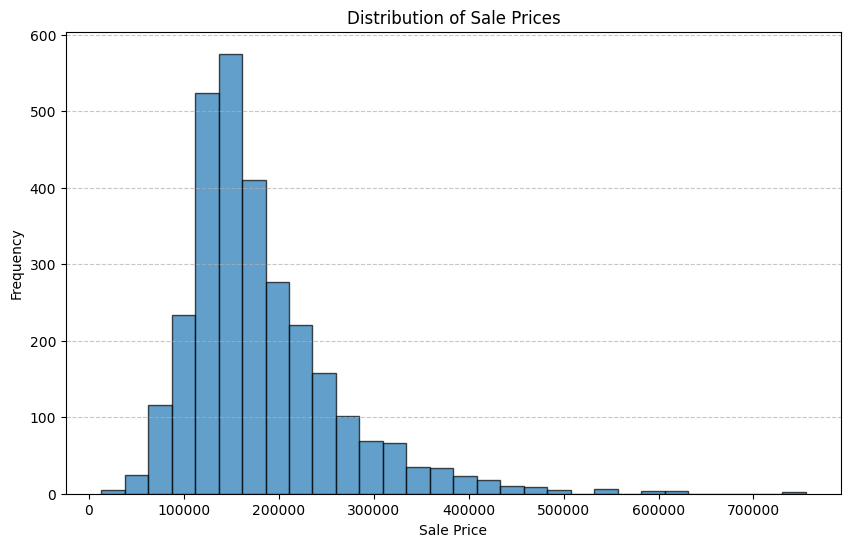

<ipython-input-4-8b5362ccbb2f>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


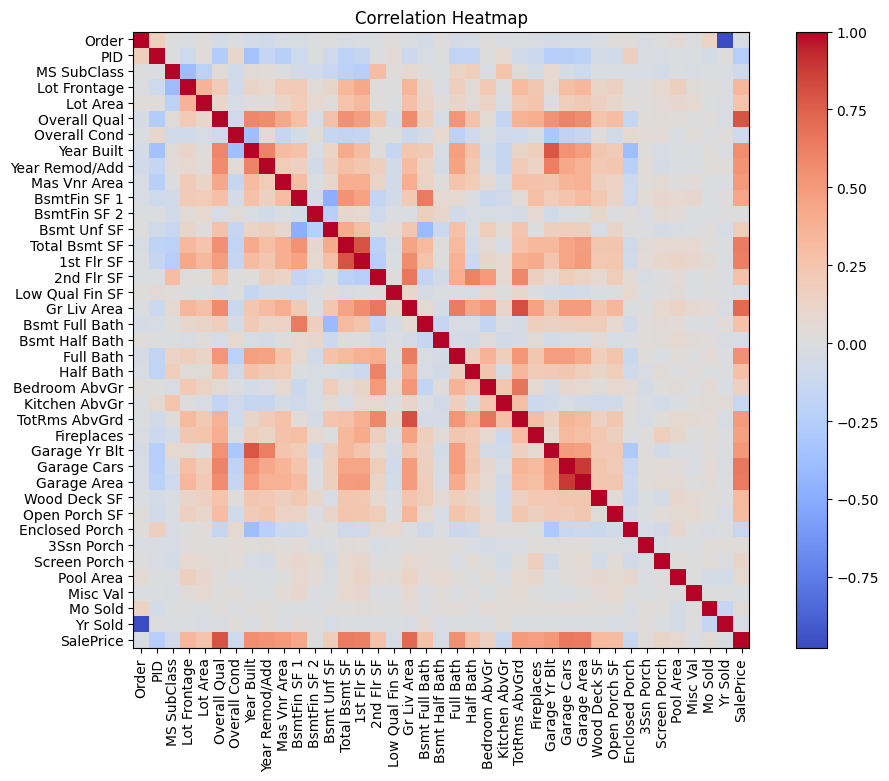

In [4]:
# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
plt.hist(data['SalePrice'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Heatmap')
plt.show()

## Creating a Model

I will create a linear regression model for this dataset. I picked a linear regression as it is easy to implement and interpret espicially since the relationship between the features and the target variable are linear. First I create a copy of the data which also converts categorical variables into numerical format using one-hot encoding. Then I separate the data and train the model.

In [10]:
# Convert categorical variables to numerical format using one-hot encoding
data = pd.get_dummies(data)

# Separate features and target variable
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error (MAE): 15890.316786709935
Mean Squared Error (MSE): 864935835.9594202
Root Mean Squared Error (RMSE): 29409.791498060986
R^2 Score: 0.8921196551098771


## Analysis

With a MAE of 15890, the model's predictions on average are off by \\$15890. The MSE is espically large since the errors are squared and with the prices of houses being so large it makes this metric less interpretable in terms of the actual units of the target variable. However, it provides a way to penalize larger errors more than smaller ones. A RMSE of \\$29410 indicates that, on average, the model's predictions are \\$29410 off of the actual house prices. Since the RMSE is larger than the MAE, this indicates some larger errors are impacting the performance of the model. Lastly an R² score of 0.8921 means that approximately 89.21% of the variability in house prices can be explained by the model's input features. This is a high value, indicating that the model has a good fit to the data.

## Discussion and Conclusion

### Discussion
Model Performance

The Linear Regression model demonstrated a strong ability to predict house prices with an R² score of 0.8921. This high R² score indicates that approximately 89.21% of the variance in the house prices can be explained by the model's features, suggesting a good fit to the data. However, the Mean Absolute Error (MAE) of \\$15,890.32 and the Root Mean Squared Error (RMSE) of \\$29,409.79 indicate that, while the model performs well on average, there are some instances where the predicted prices deviate significantly from the actual prices.

The high RMSE compared to MAE suggests that there are some predictions with large errors, which could be due to the presence of outliers or non-linear relationships in the data that the linear model cannot capture.

### Model Interpretation

Linear Regression provides an easy-to-interpret model where the coefficients represent the relationship between each feature and the target variable. Positive coefficients indicate that an increase in the feature value leads to an increase in the house price, while negative coefficients indicate the opposite. This transparency is beneficial for understanding which factors most influence house prices.

### Feature Engineering and Selection

All features were used after one-hot encoding categorical variables, but further feature engineering could improve the model. Techniques such as creating interaction terms, polynomial features, or transforming skewed features could capture more complex relationships. Additionally, feature selection methods like Recursive Feature Elimination (RFE) or Lasso Regression could identify the most important features, potentially reducing overfitting and improving model performance.

### Handling Missing Values

Missing numerical values were imputed with the mean, and categorical values with the mode. While this approach ensures no data is lost, it may not always be the most effective method. More sophisticated techniques, such as using models to predict missing values or imputation based on feature correlations, could be explored.

### Model Limitations

* Linear Assumption: The model assumes a linear relationship between features and the target variable. If the true relationships are non-linear, the model's performance will be limited.

* Sensitivity to Outliers: Linear Regression is sensitive to outliers, which can disproportionately affect the model. Identifying and handling outliers could improve performance.

* Feature Interaction: The model does not capture interactions between features unless explicitly created. Complex relationships might be missed.

## Conclusion

#### Summary of Findings

The Linear Regression model provided a solid baseline for predicting house prices, explaining a significant portion of the variance in the target variable. The model's simplicity and interpretability make it a useful starting point for understanding the factors influencing house prices.

Recommendations for Improvement

1. Advanced Models: Exploring more complex models such as Decision Trees, Random Forests, Gradient Boosting Machines, or neural networks could capture non-linear relationships and improve predictive accuracy.

2. Regularization: Implementing regularization techniques like Ridge or Lasso Regression could help address issues of multicollinearity and improve model generalizability.

3. Feature Engineering: Developing new features, transforming existing ones, and selecting the most relevant features could enhance model performance.
   
4. Outlier Treatment: Identifying and appropriately handling outliers could reduce their impact on the model.